In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt, cm as cm
from navgridviews.Raster import Raster as NavGridView, get_discrete_cmap

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

## $\phi \in \mathcal{R}^{1}$
$\phi:$ Data to be displayed on grid view

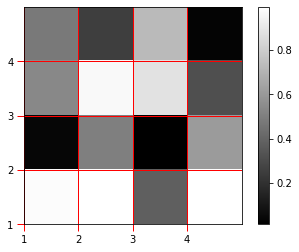

In [2]:
p = NavGridView(np.random.rand(4,4,1)).render(cmap=cm.gray).ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

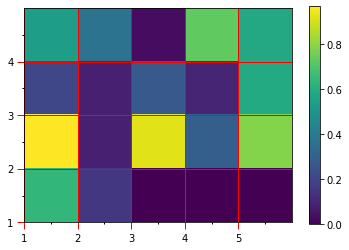

In [3]:
p = NavGridView(np.random.rand(17,1,1,1)).render(cmap=cm.viridis).ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{2}$ 

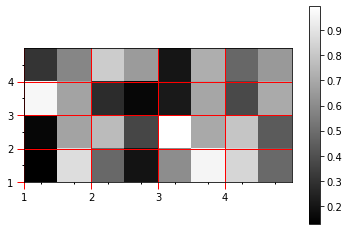

In [4]:
p = NavGridView(np.random.rand(4,4,1,2,1)).render(cmap=cm.gray).ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{3}$ 

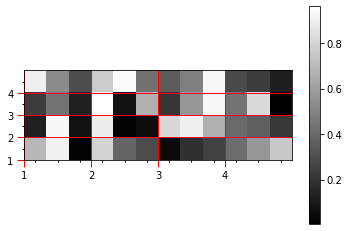

In [5]:
p = NavGridView(np.random.rand(4,4,1,3,1)).render(cmap=cm.gray).ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

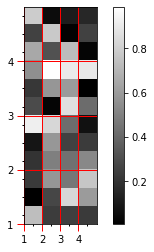

In [6]:
p = NavGridView(np.random.rand(4,4,3,1,1)).render(cmap=cm.gray).ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

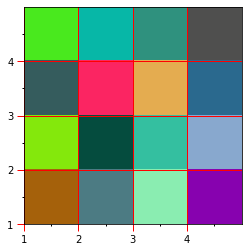

In [7]:
NavGridView(np.random.rand(4,4,1,1,3)).render().ticks(coord_sys="cartesian").grid()

## $\phi \in \mathcal{R}^{2} \times \mathcal{R}^{2}$ 

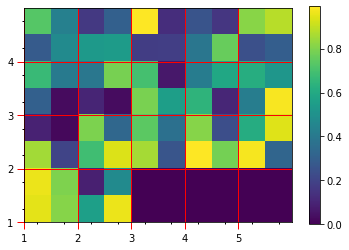

In [8]:
p = NavGridView(np.random.rand(17,2,2,1)).render().ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{16} \times \mathcal{R}^{16}$ 

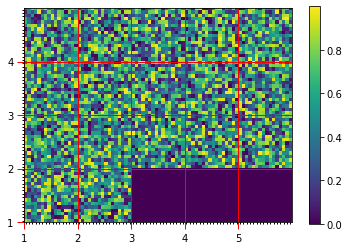

In [9]:
p = NavGridView(np.random.rand(17,16,16,1)).render().ticks(coord_sys="cartesian").grid()
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{2} \times \mathcal{R}^{2} \times \mathcal{R}^{3}$ 

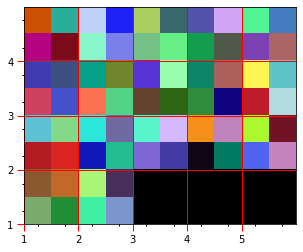

In [10]:
NavGridView(np.random.rand(17,2,2,3)).render().ticks(coord_sys="cartesian").grid()

## $\phi \in \mathcal{R}^{16} \times \mathcal{R}^{16} \times \mathcal{R}^{3}$ 

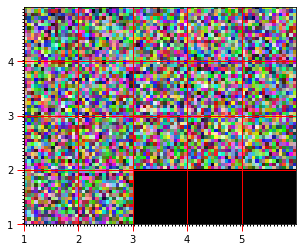

In [11]:
NavGridView(np.random.rand(17,16,16,3)).render().ticks(coord_sys="cartesian").grid()

## $\phi \in \mathcal{R}^{64} \times \mathcal{R}^{64} \times \mathcal{R}^{3}$ 

CPU times: user 105 ms, sys: 5.27 ms, total: 111 ms
Wall time: 27.6 ms


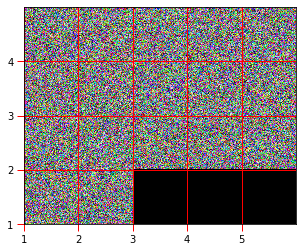

In [12]:
%%time
NavGridView(np.random.rand(17,64,64,3)).render().ticks(coord_sys="cartesian", minor=False).grid()

## $\phi \in \mathcal{R}^{768} \times \mathcal{R}^{1024} \times \mathcal{R}^{3}$ 

CPU times: user 4.07 s, sys: 559 ms, total: 4.63 s
Wall time: 2.99 s


Text(0.5, 1.0, '')

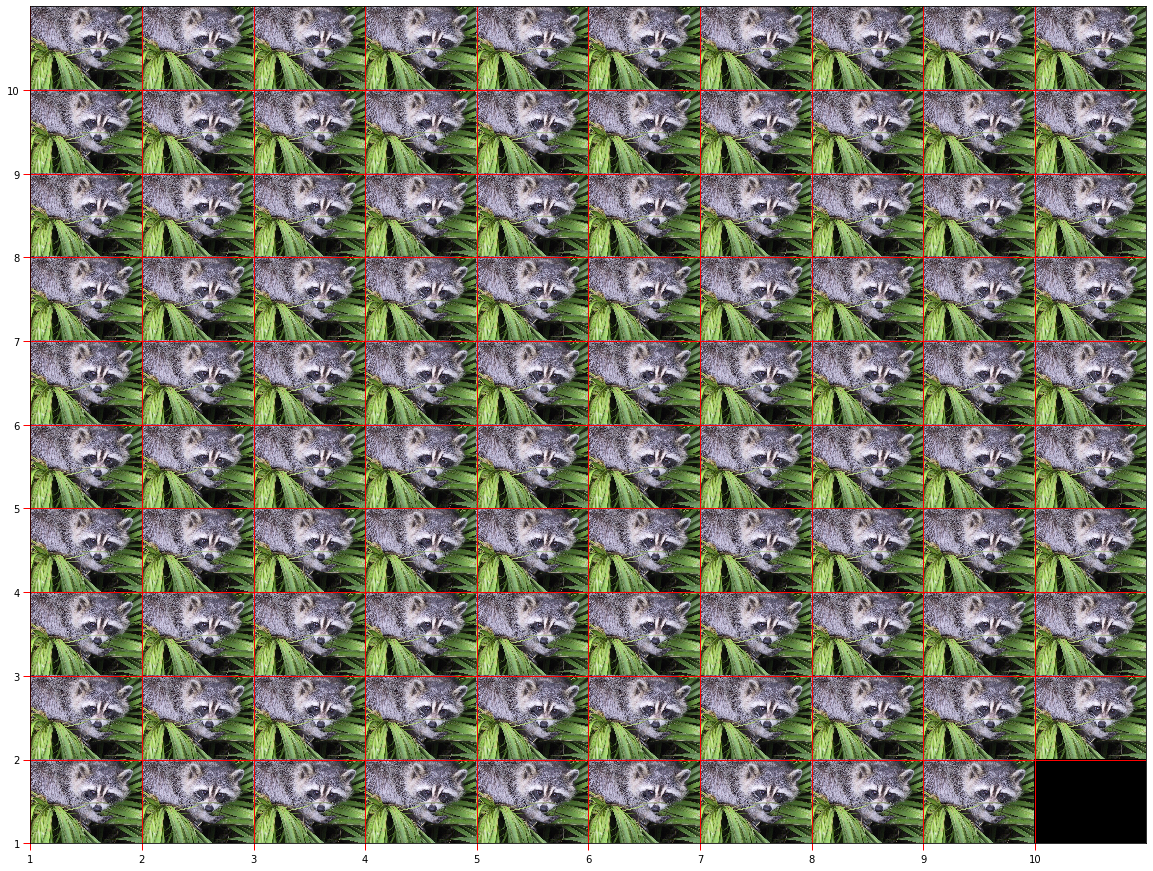

In [13]:
%%time
from scipy import misc
img = misc.face()
img_array = np.array([np.asarray(img)]*99)
fig = plt.figure(figsize=(20,20))
NavGridView(img_array).render(ax=plt.gca()).ticks(coord_sys="cartesian", minor=False).grid()
plt.title("")

CPU times: user 92.5 ms, sys: 3.87 ms, total: 96.3 ms
Wall time: 95.1 ms


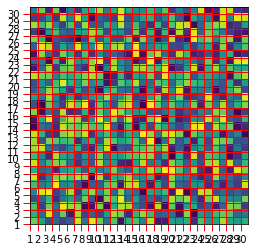

In [14]:
%%time
NavGridView(np.random.rand(30,30,1,1,1)).render().ticks(coord_sys="cartesian", minor=False).grid()

## discrete $\phi$

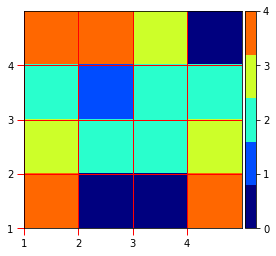

In [15]:
discrete_data = np.random.randint(0, 5, (4,4,1)).astype(np.uint8)
space = sorted(np.unique(discrete_data))
cmap = get_discrete_cmap(cm.jet, space)
p = NavGridView(discrete_data).render(cmap=cmap).ticks(coord_sys="cartesian").grid().colorbar(
    ticks = space
)

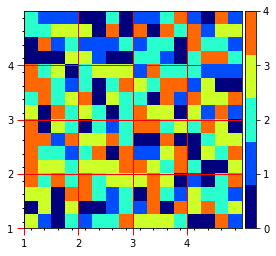

In [16]:
discrete_data = np.random.randint(0, 5, (4,4,4,4,1)).astype(np.uint8)
space = sorted(np.unique(discrete_data))
cmap = get_discrete_cmap(cm.jet, space)
p = NavGridView(discrete_data).render(cmap=cmap).ticks(coord_sys="cartesian").grid().colorbar(
    ticks = space
)